# Dependencies

In [108]:
pacman::p_load(igraph, graphlayouts, ggraph, ggforce, dplyr, ggplot2, GUniFrac, dendextend, ComplexHeatmap)

# Functions

In [109]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

In [110]:
gliph_div.fx <- function(datapath, h4hpath, gliph_in_out){
gliph_all <- readr::read_rds(file = paste0(h4hpath, "analysis/GLIPH/", gliph_in_out))
gliph_meta <- merge(gliph_all, discovery_metadata, by.x = "subject", by.y = "sample_name")
gliph_meta$disease[ is.na(gliph_meta$disease)] <- "Emerson_unknown"
pat_type <- as.data.frame.matrix(table(gliph_meta %>% select(type, subject)))
return(pat_type)
}

In [111]:
zicoseq.fx <- function(pat_type_matrix, metadata, myvar) {
    # pat_type_matrix is a matrix of GLIPH x samples
    # metadata is a data frame with the metadata for each sample, rownames are the sample names, NA is converted to Unknown for all covariates

    # Match colnames mylist[[1]] and discovery_metadata$sample_name
    metadata_matched <- metadata[colnames(pat_type_matrix), ]

    ZicoSeq.obj <- ZicoSeq(
        meta.dat = metadata_matched, feature.dat = pat_type_matrix,
        grp.name = myvar, adj.name = c("Sex", "study", "Agegroup"), feature.dat.type = "count",
        prev.filter = 0, mean.abund.filter = 0,
        max.abund.filter = 0, min.prop = 0,
        # Winsorization to replace outliers
        is.winsor = FALSE, # outlier.pct = 0.03, winsor.end = 'top',
        # Posterior sampling
        is.post.sample = TRUE, post.sample.no = 25,
        # Use the square-root transformation
        link.func = list(function(x) x^0.5), stats.combine.func = max,
        # Permutation-based multiple testing correction
        perm.no = 99, strata = NULL,
        # Reference-based multiple stage normalization
        ref.pct = 0.5, stage.no = 6, excl.pct = 0.2,
        # Family-wise error rate control
        is.fwer = TRUE, verbose = TRUE, return.feature.dat = TRUE
    )

    r2_fdr <- as.data.frame(ZicoSeq.obj$R2)
    r2_fdr$padj <- ZicoSeq.obj$p.adj.fdr[match(rownames(r2_fdr), names(ZicoSeq.obj$p.adj.fdr))]
    return(r2_fdr)
}


# Paths

In [112]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [113]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [114]:
discovery_metadata <- readr::read_rds(file = paste0(datapath, "discovery_metadata_01.rds"))
discovery_metadata$disease[ is.na(discovery_metadata$disease)] <- "Emerson_unknown"

In [115]:
dim(discovery_metadata)

[1] 973   8

In [13]:
filelist <- list.files(path = paste0(h4hpath, "analysis/GLIPH/"), pattern = "_cluster_gliph_rm_na_singlerm.rds", full.names = FALSE)
# remove *.sh
filelist <- filelist[!grepl("sh", filelist)]
# remove *.out
filelist <- filelist[!grepl("out", filelist)]
# remove *hklust.rds
filelist <- filelist[!grepl("hklust", filelist)]

In [14]:
filelist

[1] "gliphinput_int_adaptive_sample_01_cluster_gliph_rm_na_singlerm.rds"
 [2] "gliphinput_int_adaptive_sample_02_cluster_gliph_rm_na_singlerm.rds"
 [3] "gliphinput_int_adaptive_sample_03_cluster_gliph_rm_na_singlerm.rds"
 [4] "gliphinput_int_adaptive_sample_04_cluster_gliph_rm_na_singlerm.rds"
 [5] "gliphinput_int_adaptive_sample_05_cluster_gliph_rm_na_singlerm.rds"
 [6] "gliphinput_int_adaptive_sample_06_cluster_gliph_rm_na_singlerm.rds"
 [7] "gliphinput_int_adaptive_sample_07_cluster_gliph_rm_na_singlerm.rds"
 [8] "gliphinput_int_adaptive_sample_08_cluster_gliph_rm_na_singlerm.rds"
 [9] "gliphinput_int_adaptive_sample_09_cluster_gliph_rm_na_singlerm.rds"
[10] "gliphinput_int_adaptive_sample_10_cluster_gliph_rm_na_singlerm.rds"
[11] "gliphinput_int_adaptive_sample_11_cluster_gliph_rm_na_singlerm.rds"
[12] "gliphinput_int_adaptive_sample_12_cluster_gliph_rm_na_singlerm.rds"
[13] "gliphinput_int_adaptive_sample_13_cluster_gliph_rm_na_singlerm.rds"
[14] "gliphinput_int_adaptive_sample_14_cluster_gliph_rm_na_singlerm.rds"
[15] "gliphinput_int_adaptive_sample_15_cluster_gliph_rm_na_singlerm.rds"
[16] "gliphinput_int_adaptive_sample_16_cluster_gliph_rm_na_singlerm.rds"
[17] "gliphinput_int_adaptive_sample_17_cluster_gliph_rm_na_singlerm.rds"
[18] "gliphinput_int_adaptive_sample_18_cluster_gliph_rm_na_singlerm.rds"
[19] "gliphinput_int_adaptive_sample_19_cluster_gliph_rm_na_singlerm.rds"
[20] "gliphinput_int_adaptive_sample_20_cluster_gliph_rm_na_singlerm.rds"

In [15]:
mylist <- lapply(filelist, function(x){ gliph_div.fx(datapath, h4hpath, x )})

In [16]:
head(mylist[[1]])

,310102_TCRB,310103_TCRB,310104_TCRB,310105_TCRB,310106_TCRB,310108_TCRB,310109_TCRB,310110_TCRB,310111_TCRB,310112_TCRB,...,Peds_Ctrl_1,Peds_Ctrl_2,Peds_Ctrl_7,Peds_Febrile_Ctrl_1,Peds_Febrile_Ctrl_3,Peds_Febrile_Ctrl_5,Peds_Febrile_Ctrl_6,sJIA_2,sJIA_4,sJIA_7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
global-%AG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%AGTE,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%ENTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%GE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#mylist <- lapply(mylist, function(x) as.data.frame(x))

# ZicoSeq

In [116]:
rownames(discovery_metadata) <- discovery_metadata$sample_name

In [117]:
# make a new variable for the disease
# Group Leukemia, Lymphoma and Solid together as Cancer, all others as Non-Cancer
discovery_metadata$disease_group <- discovery_metadata$disease
discovery_metadata$disease_group[discovery_metadata$disease %in% c("Leukemia", "Lymphoma", "Solid")] <- "Cancer"
discovery_metadata$disease_group[!discovery_metadata$disease %in% c("Leukemia", "Lymphoma", "Solid")] <- "Non-Cancer"

In [118]:
discovery_metadata$Sex[ is.na(discovery_metadata$Sex)] <- "Unknown"
discovery_metadata$Agegroup[ is.na(discovery_metadata$Agegroup)] <- "Unknown"

In [119]:
lapply(mylist, function(x) dim(x))

[[1]]
[1] 756 813

[[2]]
[1] 704 824

[[3]]
[1] 727 822

[[4]]
[1] 711 820

[[5]]
[1] 740 819

[[6]]
[1] 763 828

[[7]]
[1] 738 814

[[8]]
[1] 748 811

[[9]]
[1] 693 814

[[10]]
[1] 666 802

[[11]]
[1] 764 817

[[12]]
[1] 733 823

[[13]]
[1] 772 817

[[14]]
[1] 748 801

[[15]]
[1] 761 827

[[16]]
[1] 709 816

[[17]]
[1] 760 820

[[18]]
[1] 679 824

[[19]]
[1] 679 826

[[20]]
[1] 811 820

In [20]:
# get number of zero for each row in each matrix
mylist_5 <- lapply(mylist, \(x) { x[rowSums(x != 0) > 9  , ] })
mylist_5 <- lapply(mylist_5, \(x) { x[ ,colSums(x != 0) > 1   ] })


In [21]:
zicolist  <- lapply(mylist_5, \(x) {zicoseq.fx(as.matrix(x), discovery_metadata, "disease_group")} )

0  features are filtered!
The data has  730  samples and  446  features will be tested!
Fitting beta mixture ...
Finding the references ...
Permutation testing ...
.........
.........
.........
.........
.........
.........
Completed!
0  features are filtered!
The data has  729  samples and  407  features will be tested!
Fitting beta mixture ...
Finding the references ...
Permutation testing ...
.........
.........
.........
.........
.........
.........
Completed!
0  features are filtered!
The data has  744  samples and  425  features will be tested!
Fitting beta mixture ...
Finding the references ...
Permutation testing ...
.........
.........
.........
.........
.........
.........
Completed!
0  features are filtered!
The data has  713  samples and  384  features will be tested!
Fitting beta mixture ...
Finding the references ...
Permutation testing ...
.........
.........
.........
.........
.........
.........
Completed!
0  features are filtered!
The data has  721  samples and  41

In [22]:
length(zicolist)

[1] 20

In [23]:
dfColList <- lapply(zicolist ,rownames)
commonCols <- Reduce(intersect,dfColList)

In [24]:
commonCols

[1] "global-%E"      "global-S%"      "global-S%GGE"   "global-S%GTE"  
 [5] "global-S%NTE"   "global-S%QGNTE" "global-SE%GE"   "global-SL%GE"  
 [9] "global-SLG%E"   "global-SQ%GE"

In [25]:
zicolist <- lapply(zicolist ,\(x) x[  order(x$padj, decreasing = F),])

In [26]:
lapply(zicolist , head)

,Func1,padj
,<dbl>,<dbl>
global-S%GNEK,0.06690115,0.07070707
global-S%DSGANV,0.04017443,0.13019080
global-S%GGNT,0.02649754,0.13019080
global-S%GTGGTE,0.02619123,0.13019080
global-SESG%TE,0.02764503,0.13019080
global-SL%GGE,0.02687032,0.13019080
,Func1,padj
,<dbl>,<dbl>
global-%GE,0.03683816,0.0523416


A lot of these TCR groups are highly similar, for example global-SE%RNTE, global-SET%NTE. Let's group them together based on PID on H4H and rerun zicoseq

# Group similar TCR groups

In [160]:
filelist <- list.files(path = paste0(h4hpath, "analysis/GLIPH/"), pattern = "_cluster_gliph_rm_na_singlerm.rds_hklust.rds", full.names = FALSE)

In [161]:
filelist

[1] "gliphinput_int_adaptive_sample_02_cluster_gliph_rm_na_singlerm.rds_hklust.rds"

In [162]:
onetest <- readr::read_rds(file = paste0(h4hpath, "analysis/GLIPH/", filelist[1]))

In [163]:
dim(onetest)

[1] 12385    29

In [164]:
#separate rwos by comma in subject column to capture all subjects with the same cluster
onetest <- tidyr::separate_rows(onetest, subject, sep = ",")
# trimws
onetest$subject <- trimws(onetest$subject)

In [165]:
dim(onetest)

[1] 13538    29

In [166]:
head(discovery_metadata)

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name,disease_group
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Peds_Ctrl_2,Peds_Ctrl_2,NA,PBMC,Henderson,Child,Unknown,Peds healthy Control,Peds_Ctrl_2,Non-Cancer
MAS_3,MAS_3,NA,PBMC,Henderson,Child,Unknown,MAS,MAS_3,Non-Cancer
Peds_Febrile_Ctrl_3,Peds_Febrile_Ctrl_3,NA,PBMC,Henderson,Child,Unknown,Peds febrile Control,Peds_Febrile_Ctrl_3,Non-Cancer
KD_4,KD_4,NA,PBMC,Henderson,Child,Unknown,KD,KD_4,Non-Cancer
KD_3,KD_3,NA,PBMC,Henderson,Child,Unknown,KD,KD_3,Non-Cancer
sJIA_7,sJIA_7,NA,PBMC,Henderson,Child,Unknown,sJIA,sJIA_7,Non-Cancer


In [79]:
# remove non normal non cancer samples
discovery_metadata <- discovery_metadata[!discovery_metadata$disease %in% 
c("KD", "MAS", "LFS", "Peds healthy Control",
"MIS-C SARSCoV2Neg", "MIS-C SARSCoV2Pos", 
"Peds febrile Control", "Peds COVID19", "sJIA"), ]

In [80]:
onetest <- onetest[ onetest$subject %in% discovery_metadata$sample_name, ]

In [195]:
onetest$hklust <- paste0("Cluster_", onetest$hklust)

In [196]:
pat_type <- as.data.frame.matrix(table(onetest %>% select(hklust, subject)))

In [197]:
head(pat_type)

,310103_TCRB,310104_TCRB,310105_TCRB,310106_TCRB,310108_TCRB,310109_TCRB,310110_TCRB,310111_TCRB,310113_TCRB,310114_TCRB,...,Peds_Ctrl_2,Peds_Ctrl_7,Peds_Febrile_Ctrl_1,Peds_Febrile_Ctrl_2,Peds_Febrile_Ctrl_3,Peds_Febrile_Ctrl_5,Peds_Febrile_Ctrl_6,sJIA_2,sJIA_4,sJIA_7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Cluster_1,2,5,20,8,3,4,0,5,1,5,...,0,4,2,1,3,1,4,1,1,0
Cluster_10,0,1,6,0,0,3,0,2,0,0,...,1,0,0,0,1,1,1,0,0,0
Cluster_11,0,2,2,1,0,0,0,0,0,1,...,1,1,0,0,0,0,2,0,0,0
Cluster_12,0,0,4,2,0,0,0,0,1,0,...,0,0,0,0,2,0,0,0,0,0
Cluster_13,0,0,6,2,0,0,0,2,0,0,...,0,3,0,0,0,0,0,0,0,0
Cluster_14,0,0,1,1,2,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0


In [198]:
table(discovery_metadata$study, useNA = "ifany")


  Emerson Henderson INTERCEPT  Mitchell 
      654        25        91       203 

In [199]:
table(discovery_metadata$disease)


                Ctrl    Cytomegalovirus +    Cytomegalovirus - 
                  94                  284                  346 
     Emerson_unknown                   KD                  LFS 
                  24                    4                    6 
            Leukemia             Lymphoma                  MAS 
                  36                   13                    3 
   MIS-C SARSCoV2Neg    MIS-C SARSCoV2Pos               Normal 
                   2                    2                    8 
        Peds COVID19 Peds febrile Control Peds healthy Control 
                   3                    5                    3 
               Solid                  T1D                 sJIA 
                  28                  109                    3 

In [200]:
discovery_metadata[ discovery_metadata$Agegroup == "Years" ,]

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name,disease_group
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
P00612,P00612,NA,PBMC,Emerson,Years,Female,Cytomegalovirus -,P00612,Non-Cancer
P00614,P00614,NA,PBMC,Emerson,Years,Female,Cytomegalovirus -,P00614,Non-Cancer


In [201]:
table(discovery_metadata$Agegroup, useNA = "ifany")



 Adolescent       Adult       Child     Neonate     Unknown       Years 
         35         431         272          35         159           2 
Young Adult 
         39 

In [148]:
rownames(discovery_metadata) <- discovery_metadata$sample_name

In [202]:
head(discovery_metadata)

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name,disease_group
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Peds_Ctrl_2,Peds_Ctrl_2,NA,PBMC,Henderson,Child,Unknown,Peds healthy Control,Peds_Ctrl_2,Non-Cancer
MAS_3,MAS_3,NA,PBMC,Henderson,Child,Unknown,MAS,MAS_3,Non-Cancer
Peds_Febrile_Ctrl_3,Peds_Febrile_Ctrl_3,NA,PBMC,Henderson,Child,Unknown,Peds febrile Control,Peds_Febrile_Ctrl_3,Non-Cancer
KD_4,KD_4,NA,PBMC,Henderson,Child,Unknown,KD,KD_4,Non-Cancer
KD_3,KD_3,NA,PBMC,Henderson,Child,Unknown,KD,KD_3,Non-Cancer
sJIA_7,sJIA_7,NA,PBMC,Henderson,Child,Unknown,sJIA,sJIA_7,Non-Cancer


In [216]:
   #pat_type <- pat_type[, colnames(pat_type) %in% discovery_metadata$sample_name ]
   metadata_matched <- discovery_metadata[colnames(pat_type), ]

    mytest <- ZicoSeq(
        meta.dat = metadata_matched, feature.dat = as.matrix(pat_type),
        grp.name = "disease_group", adj.name = c("Agegroup", "study", "Sex"), feature.dat.type = "count",
        # Filter to remove rare taxa
        prev.filter = 0.01, mean.abund.filter = 0,
        max.abund.filter = 0, min.prop = 0,
        # Winsorization to replace outliers
        is.winsor = FALSE, # outlier.pct = 0.03, winsor.end = 'top',
        # Posterior sampling
        is.post.sample = TRUE, post.sample.no = 25,
        # Use the square-root transformation
        link.func = list(function(x) x^0.5), stats.combine.func = max,
        # Permutation-based multiple testing correction
        perm.no = 99, strata = NULL,
        # Reference-based multiple stage normalization
        ref.pct = 0.5, stage.no = 6, excl.pct = 0.2,
        # Family-wise error rate control
        is.fwer = TRUE, verbose = TRUE, return.feature.dat = TRUE
    )

5  features are filtered!
The data has  831  samples and  30  features will be tested!
Fitting beta mixture ...
Finding the references ...
Permutation testing ...
.........
.........
.........
.........
.........
.........
Completed!


In [217]:
r2_fdr <- as.data.frame(mytest$R2)
r2_fdr$padj <- mytest$p.adj.fdr[match(rownames(r2_fdr), names(mytest$p.adj.fdr))]
r2_fdr$p <- mytest$p.raw[match(rownames(r2_fdr), names(mytest$p.raw))]

In [218]:
r2_fdr

,Func1,padj,p
,<dbl>,<dbl>,<dbl>
Cluster_1,0.0006917645,0.3737374,0.19
Cluster_10,0.0009588398,0.4361260,0.19
Cluster_11,0.0012493345,0.4361260,0.22
Cluster_12,0.0003068340,0.8899338,0.95
Cluster_13,0.0010955238,0.5025253,0.45
Cluster_14,0.0002887832,0.8899338,0.94
Cluster_15,0.0016584815,0.3737374,0.09
Cluster_16,0.0002696692,0.9441077,0.74
Cluster_17,0.0004963742,0.8298990,0.78


In [219]:
onetest[ onetest$hklust %in% c("Cluster_4","Cluster_5"), c("Xpattern", "subject", "hklust")]

Xpattern,subject,hklust
<chr>,<chr>,<chr>
SPRXGE,310103_TCRB,Cluster_4
SXVGDE,310103_TCRB,Cluster_4
SFXNTE,310104_TCRB,Cluster_4
SGXQNTE,310104_TCRB,Cluster_5
SXRDTE,310104_TCRB,Cluster_4
SLLGXTE,310104_TCRB,Cluster_5
SQGXNTE,310104_TCRB,Cluster_5
SEXQGTE,310104_TCRB,Cluster_5
SXGGTE,310104_TCRB,Cluster_4


In [225]:
which(mytest$p.raw < 0.1)

Cluster_15 Cluster_19 Cluster_20 Cluster_29  Cluster_3  Cluster_4  Cluster_5 
         7         11         13         21         22         25         26 
 Cluster_9 
        30

In [228]:
head(metadata_matched)

,Patient,Age,sampletype,study,Agegroup,Sex,disease,sample_name,disease_group
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
310103_TCRB,Control 001,3,PBMC,Mitchell,Child,Female,Ctrl,310103_TCRB,Non-Cancer
310104_TCRB,Control 002,1,PBMC,Mitchell,Neonate,Male,Ctrl,310104_TCRB,Non-Cancer
310105_TCRB,Subject 019,1,PBMC,Mitchell,Neonate,Male,T1D,310105_TCRB,Non-Cancer
310106_TCRB,Control 023,1,PBMC,Mitchell,Neonate,Male,Ctrl,310106_TCRB,Non-Cancer
310108_TCRB,Control 015,0,PBMC,Mitchell,Neonate,Female,Ctrl,310108_TCRB,Non-Cancer
310109_TCRB,Control 020,1,PBMC,Mitchell,Neonate,Male,Ctrl,310109_TCRB,Non-Cancer


In [230]:
names(mytest)

[1] "call"            "feature.dat"     "filter.features" "ref.features"   
 [5] "R2"              "F0"              "RSS"             "df.model"       
 [9] "df.residual"     "coef.list"       "p.raw"           "p.adj.fdr"      
[13] "p.adj.fwer"

In [231]:
head(r2_fdr)

,Func1,padj,p
,<dbl>,<dbl>,<dbl>
Cluster_1,0.0006917645,0.3737374,0.19
Cluster_10,0.0009588398,0.4361260,0.19
Cluster_11,0.0012493345,0.4361260,0.22
Cluster_12,0.0003068340,0.8899338,0.95
Cluster_13,0.0010955238,0.5025253,0.45
Cluster_14,0.0002887832,0.8899338,0.94


In [235]:
p <- ggplot(r2_fdr, aes(x=Func1, y=-log10(padj))) +
    geom_point(size=2.5) +
    #scale_colour_manual(values = c("Down-regulated"= "blue", "Up-regulated"="red",  "not significant"= "black")) +    

    myplot + myaxis +
    theme(axis.text.x = element_text(size = 30, angle = 0, hjust = 0.5),
          axis.title = element_text(size = 30), axis.text.y = element_text(size = 30),
          plot.title = element_text(size = 30, hjust = 0.5), legend.position = "none") + 
    labs(x = "Fold change (Log2)" ,y = "p-value (-Log10)")     

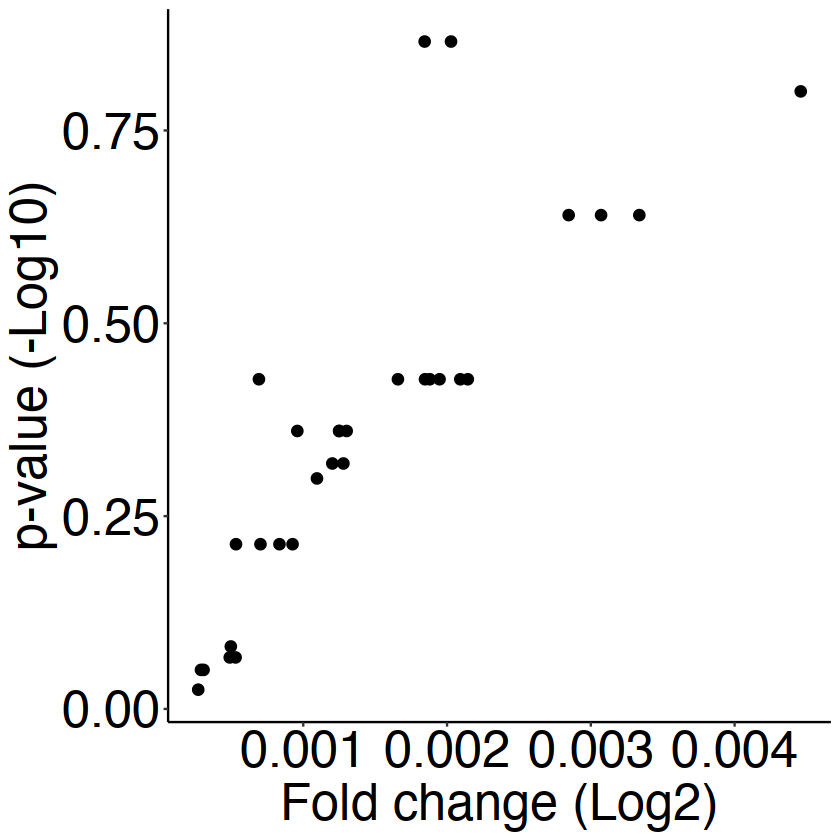

In [236]:
p

In [ ]:
dds <- DESeqDataSetFromTximport(txi, colData = metadata, 
                                design = ~ EA.Sequencing.Batch + disease_group + sample_origin + response)
dds$response <- relevel(dds$response, ref = "No")

In [ ]:
dds1 <- DESeq(ddsoriginal, parallel = TRUE)

In [154]:
head(onetest)

,Sample,index.x,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,...,TcRa,Freq,CDR3b,TRBV,TRBJ,count,clonefraction,subject,file,index.y
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<lgl>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>
1,310102_TCRB:6569,213,SDL%T,1.6e-04,7,7,3.0e-09,1,0.005,0.700,...,NA,0,CATSDLETQYF,TRBV24-01,TRBJ02-05,NA,8.252664e-06,310102_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310102_TCRB.tsv,6569
2,310102_TCRB:6579,161,S%GESQP,8.7e-05,5,5,6.4e-07,1,0.460,0.960,...,NA,0,CSASGGESQPQHF,TRBV20-01,TRBJ01-05,NA,1.650533e-05,310102_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310102_TCRB.tsv,6579
3,310103_TCRB:6665,171,S%RDNTE,8.8e-05,10,8,1.5e-08,1,0.130,0.130,...,NA,0,CASSIRDNTEAFF,TRBV19-01,TRBJ01-01,NA,1.085717e-05,310103_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310103_TCRB.tsv,6665
4,310104_TCRB:6701,16,S%SGNT,2.4e-07,49,26,1.4e-09,1,1.000,0.036,...,NA,0,CASSPSGNTIYF,TRBV14-01,TRBJ01-03,NA,5.449324e-06,310104_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310104_TCRB.tsv,6701
5,310104_TCRB:6708,251,S%GQP,2.1e-04,23,15,6.2e-08,1,0.990,0.660,...,NA,0,CASSTGQPQHF,TRBV19-01,TRBJ01-05,NA,5.449324e-06,310104_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310104_TCRB.tsv,6708
6,310104_TCRB:6734,179,SLA%E,9.4e-05,46,25,6.8e-10,1,0.190,0.070,...,NA,0,CASSLAEEQFF,TRBV07-08,TRBJ02-01,NA,5.449324e-06,310104_TCRB,/cluster/projects/pughlab/projects/INTERCEPT/Adaptive/Mitchell_Michels2022/310104_TCRB.tsv,6734


In [180]:
aln.fx <- function(x) {

    mygroups <- gsub("%", "X", unique(x$pattern))
    mymat <- matrix(0,
        nrow = length(mygroups), ncol = length(mygroups),
        dimnames = list(mygroups, mygroups)
    )
    D <- combn(length(mygroups), 2)

    for (i in 1:ncol(D)) {
        aln <- pairwiseAlignment(
            rownames(mymat)[D[1, i]],
            rownames(mymat)[D[2, i]],
            substitutionMatrix = BLOSUM62, gapOpening = -2, gapExtension = -10)
        # print(aln)
        mymat[D[1, i], D[2, i]] <- score(aln)
        mymat[D[2, i], D[1, i]] <- score(aln)
    }
    return(mymat)
}


In [181]:
mm <- aln.fx(onetest[1:50,])

In [182]:
dist_mat <- dist(mymat, method = 'euclidean')
hclust_avg <- hclust(dist_mat, method = 'average')
cut_avg <- cutree(hclust_avg, h = quantile(dist_mat,0.25))


In [183]:
onetest1 <- onetest[1:50,]

In [193]:
mygroups <- gsub("%", "X", unique(onetest1$pattern))
    mymat <- matrix(0,
        nrow = length(mygroups), ncol = length(mygroups),
        dimnames = list(mygroups, mygroups))

In [196]:
D <- combn(length(mygroups), 2)

    for (i in 1:ncol(D)) {
        aln <- pairwiseAlignment(
            rownames(mymat)[D[1, i]],
            rownames(mymat)[D[2, i]],
            substitutionMatrix = BLOSUM62, gapOpening = -2, gapExtension = -10)
        # print(aln)
        mymat[D[1, i], D[2, i]] <- score(aln)
        mymat[D[2, i], D[1, i]] <- score(aln)
    }

In [244]:
dist_mat <- dist(mymat, method = 'euclidean')
hclust_avg <- hclust(dist_mat, method = 'average')
cut_avg <- dendextend::cutree(hclust_avg, h = quantile(dist_mat,0.1))

In [230]:
names(hclust_avg)

[1] "merge"       "height"      "order"       "labels"      "method"     
[6] "call"        "dist.method"

In [231]:
names(cut_avg)

[1] "SDLXT"     "SXGESQP"   "SXRDNTE"   "SXSGNT"    "SXGQP"     "SLAXE"    
 [7] "SGQGXGE"   "SPX"       "XGNTE"     "SDXGQP"    "SQGXNTE"   "SXHTGE"   
[13] "SLXTGE"    "SXGYTE"    "SXGDT"     "SLGXE"     "SPXRG"     "SXEQGRE"  
[19] "SLXGTGE"   "SLGGSXTE"  "SXSNQP"    "RGTXDYE"   "SXGQNYG"   "SXNTE"    
[25] "XQNTE"     "SLXGAGANV" "RXDRE"     "SFXGNT"    "SLDXGNT"   "SLXSGNT"  
[31] "SLVGGXTE"  "XAGTE"     "SLQGXNTE"  "SXSGQP"    "SEXYE"     "SXAYE"    
[37] "SXANTE"    "SLXGSGNT"  "SXGVGTE"   "SLXDQP"    "SLGQGXTE"  "SXGQGNQP" 
[43] "SXSSYNSP"  "SLGLX"     "SFXGE"     "SLEGXGE"   "SXADT"     "SEXGE"    
[49] "SXPGQP"    "SEXGTGE"

In [232]:
onetest1$pattern1 <- gsub("%", "X", onetest1$pattern)

In [233]:
onetest1$hk <- cut_avg[match(onetest1$pattern1, names(cut_avg))]

In [236]:
(table(cut_avg))

cut_avg
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 
12  2  2  2  1  6  1  4  5  4  4  1  1  2  1  1  1 

In [239]:
library(dendextend)
row_dend = as.dendrogram(hclust_avg)
row_dend = color_branches(row_dend, k = length((table(cut_avg)))) 
hm <- ComplexHeatmap::Heatmap(mymat, name = "mat", 
cluster_rows = row_dend, row_dend_width = unit(4, "cm"))

In [240]:
pdf(paste0(plotpath, "test.pdf"), width = 10, height = 10)
hm
dev.off()

pdf 
  2

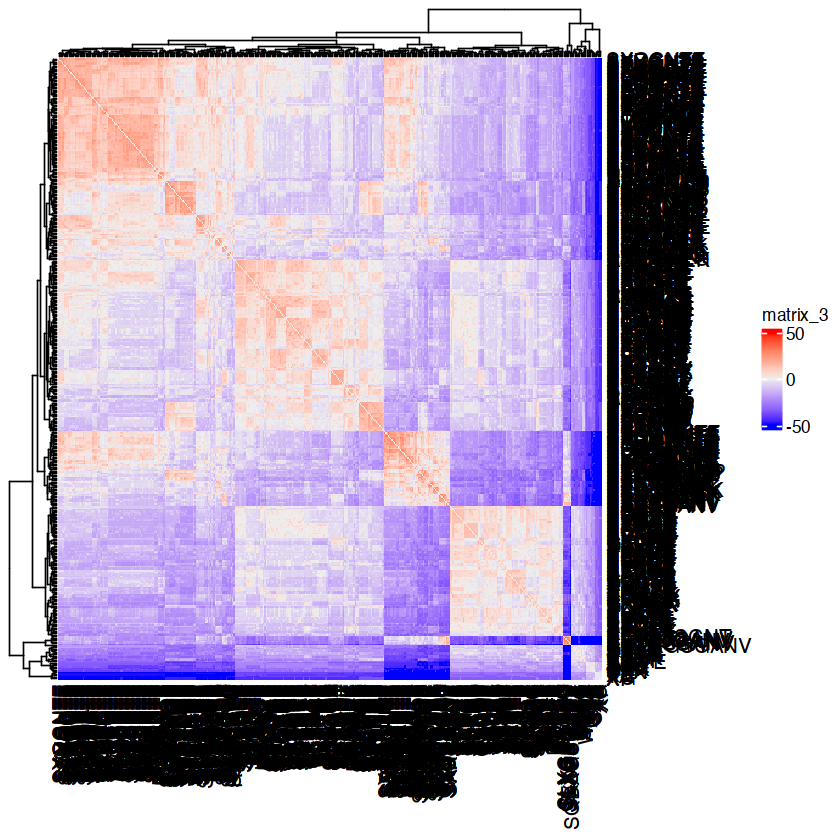

In [109]:
ComplexHeatmap::Heatmap(mymat)

In [148]:
head(onetest)

,310104_TCRB,310106_TCRB,310108_TCRB,310109_TCRB,310110_TCRB,310111_TCRB,310113_TCRB,310114_TCRB,310117_TCRB,310118_TCRB,...,P00667,P00668,Peds_COVID19_08,Peds_Ctrl_1,Peds_Ctrl_2,Peds_Ctrl_7,Peds_Febrile_Ctrl_3,Peds_Febrile_Ctrl_5,Peds_Febrile_Ctrl_6,sJIA_2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
global-%AGTE,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%ENTE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%GE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
global-%GEK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
volcano.fx <- function(resdf, fc, padj, ttl){
    
    # remove padj = NA
    
    resdf <- resdf[ !is.na(resdf$padj),]
    
    resdf$threshold <- NA
    resdf$threshold[ resdf$log2FoldChange > fc & resdf$padj < padj] <- "Up-regulated"
    resdf$threshold[ resdf$log2FoldChange < -fc & resdf$padj < padj] <- "Down-regulated"
    resdf$threshold[ is.na(resdf$threshold)] <- "not significant"
    
res_upreg <- resdf[ resdf$threshold == "Up-regulated",]    
res_upreg <- res_upreg[order(res_upreg$log2FoldChange, decreasing = T),]    
res_downreg <- resdf[ resdf$threshold == "Down-regulated",]    
res_downreg <- res_downreg[order(res_downreg$log2FoldChange, decreasing = F),]  

if(nrow(res_upreg) < 10){
    resdf$genelabels[ rownames(resdf) %in% rownames(res_upreg)] <- "UP"}
if(nrow(res_downreg) < 10){
    resdf$genelabels[rownames(resdf) %in% rownames(res_downreg)] <- "DOWN"}    

if(nrow(res_upreg) >= 10){
    resdf$genelabels[rownames(resdf) %in% rownames(res_upreg)[1:10]] <- "UP"   }
if(nrow(res_downreg) >= 10){
    resdf$genelabels[rownames(resdf) %in% rownames(res_downreg)[1:10]] <- "DOWN" } 
    
    p <- ggplot(resdf, aes(x=log2FoldChange, y=-log10(pvalue))) +
    geom_point(aes(color = threshold), size=2.5) +
    scale_colour_manual(values = c("Down-regulated"= "blue", "Up-regulated"="red",  "not significant"= "black")) +    
    geom_text_repel(data = subset(resdf, genelabels == "UP"),
                    label = subset(resdf, genelabels == "UP")$Gene_gencode,
                    size = 8, box.padding = 1, max.overlaps = Inf,  min.segment.length = 0,
                    direction = "both", nudge_x = 3, nudge_y = 0.5, vjust = 0.5, hjust = 0.5) + 
    geom_text_repel(data = subset(resdf, genelabels == "DOWN"),
                    label = subset(resdf, genelabels == "DOWN")$Gene_gencode,
                    size = 8, box.padding = 1, max.overlaps = Inf, direction = "both", 
                    nudge_x = -3, nudge_y = 0.5,
                    vjust = 0.5, hjust = 0.5, min.segment.length = 0) + 
    myplot + myaxis +
    theme(axis.text.x = element_text(size = 30, angle = 0, hjust = 0.5),
          axis.title = element_text(size = 30), axis.text.y = element_text(size = 30),
          plot.title = element_text(size = 30, hjust = 0.5), legend.position = "none") + 
    labs(x = "Fold change (Log2)" ,y = "p-value (-Log10)", title = ttl)     
    
    return(p)
}